# Install Packages

In [96]:
# install fbprophet
!pip install fbprophet

# import packages

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import to_datetime
from matplotlib import dates as mpl_dates

# Google drive setup

In [98]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Read data from CSV

In [99]:
!cd "/content/drive/My Drive/SHMT/02_ProbationTask/"
data=pd.read_csv("owid-covid-data.csv")
pd.set_option('display.max_rows',None)
print(data.head())

  iso_code continent  ... human_development_index excess_mortality
0      AFG      Asia  ...                   0.511              NaN
1      AFG      Asia  ...                   0.511              NaN
2      AFG      Asia  ...                   0.511              NaN
3      AFG      Asia  ...                   0.511              NaN
4      AFG      Asia  ...                   0.511              NaN

[5 rows x 62 columns]


# Filter Data

In [100]:
#select necessary columns
data_sub=data.loc[:,["date","location","total_cases","total_deaths"]]

### Dataframe for ques 4 (forecasting)

In [101]:
# filter for India
data_forecast=data.query("location=='India' & new_cases!=0")
data_forecast=data_forecast.loc[:,["date","new_cases"]]
#print(data_forecast.tail())

## Dataframe for ques 5 (monthly trend)

In [102]:
#for quest 5
#data_trend=data_sub.query("location in ('Africa','Asia','Europe','North America','Oceania','South America')")
data_trend=data_sub.query("location in ('World')")
data_trend=data_trend.query("date in ('2020-10-31','2020-11-30','2020-12-31','2021-01-31','2021-02-28','2021-03-31','2021-04-30','2021-05-31','2021-06-30','2021-07-31','2021-08-31','2021-09-30','2021-10-30')")
print("data_trend")
print(data_trend)

data_trend
              date location  total_cases  total_deaths
115085  2020-10-31    World   46145023.0     1248717.0
115115  2020-11-30    World   63422641.0     1525198.0
115146  2020-12-31    World   83637792.0     1880709.0
115177  2021-01-31    World  103081801.0     2298816.0
115205  2021-02-28    World  114232608.0     2609758.0
115236  2021-03-31    World  128951315.0     2909946.0
115266  2021-04-30    World  151456844.0     3288482.0
115297  2021-05-31    World  170786087.0     3667940.0
115327  2021-06-30    World  182260540.0     3951057.0
115358  2021-07-31    World  197935735.0     4220739.0
115389  2021-08-31    World  217831709.0     4520193.0


## Dataframe for other questions

In [103]:
data_sub=data_sub.query("location not in ('World','Africa','Asia','Europe','North America','Oceania','South America')") # ??? cntinnetns

# Get the total case and death count by location

In [104]:
#groupby location
data_filter=data_sub.groupby(by="location").max()
print(data_filter)

                                        date  total_cases  total_deaths
location                                                               
Afghanistan                       2021-09-15     154283.0        7174.0
Albania                           2021-09-15     159423.0        2557.0
Algeria                           2021-09-15     200770.0        5630.0
Andorra                           2021-09-15      15108.0         130.0
Angola                            2021-09-15      51407.0        1360.0
Anguilla                          2021-09-10          NaN           NaN
Antigua and Barbuda               2021-09-15       2304.0          48.0
Argentina                         2021-09-15    5232358.0      113969.0
Armenia                           2021-09-15     250559.0        5056.0
Aruba                             2021-09-15          NaN           NaN
Australia                         2021-09-15      80400.0        1128.0
Austria                           2021-09-15     715893.0       

# Drop NaN values

In [105]:
#data_filter.fillna(0,inplace=True)
data_filter.dropna(inplace=True)
print(data_filter)

                                        date  total_cases  total_deaths
location                                                               
Afghanistan                       2021-09-15     154283.0        7174.0
Albania                           2021-09-15     159423.0        2557.0
Algeria                           2021-09-15     200770.0        5630.0
Andorra                           2021-09-15      15108.0         130.0
Angola                            2021-09-15      51407.0        1360.0
Antigua and Barbuda               2021-09-15       2304.0          48.0
Argentina                         2021-09-15    5232358.0      113969.0
Armenia                           2021-09-15     250559.0        5056.0
Australia                         2021-09-15      80400.0        1128.0
Austria                           2021-09-15     715893.0       10856.0
Azerbaijan                        2021-09-15     463326.0        6167.0
Bahamas                           2021-09-15      19795.0       

# Country/countries [Top 10] with most number of deaths and cases

In [106]:
print("Top 10 countries with Most Cases")
print(data_filter.total_cases.nlargest(n=10))
print("\n")

print("Top 10 countries with Most Deaths")
print(data_filter.total_deaths.nlargest(n=10))
print("\n")

Top 10 countries with Most Cases
location
United States     41627946.0
European Union    37197133.0
India             33347325.0
Brazil            21034610.0
United Kingdom     7346832.0
Russia             7091368.0
France             7007819.0
Turkey             6738860.0
Iran               5360387.0
Argentina          5232358.0
Name: total_cases, dtype: float64


Top 10 countries with Most Deaths
location
European Union    762669.0
United States     666607.0
Brazil            588597.0
India             443928.0
Mexico            269913.0
Peru              198860.0
Russia            191566.0
Indonesia         139682.0
United Kingdom    134975.0
Italy             130100.0
Name: total_deaths, dtype: float64




# Country/countries  [Top 10] with least number of deaths and cases (ignoring countries with 0 cases)

In [107]:
print("Top 10 countries with least cases")
print(data_filter.total_cases.nsmallest(n=10))
print("\n")

print("Top 10 countries with least deaths")
print(data_filter.total_deaths.nsmallest(n=10))
print("\n")

Top 10 countries with least cases
location
Vanuatu                                4.0
International                        721.0
Tanzania                            1367.0
Saint Kitts and Nevis               1556.0
Antigua and Barbuda                 2304.0
Saint Vincent and the Grenadines    2559.0
Bhutan                              2596.0
Dominica                            2698.0
Grenada                             2740.0
Sao Tome and Principe               2893.0
Name: total_cases, dtype: float64


Top 10 countries with least deaths
location
Vanuatu                              1.0
Bhutan                               3.0
Dominica                             8.0
Saint Kitts and Nevis                9.0
Saint Vincent and the Grenadines    13.0
International                       15.0
Laos                                16.0
Brunei                              23.0
New Zealand                         27.0
Iceland                             33.0
Name: total_deaths, dtype: float64




# Total number of cases and deaths in India

In [108]:
print("Total number of cases and deaths in India")
print(data_filter.query("location=='India'"))

Total number of cases and deaths in India
                date  total_cases  total_deaths
location                                       
India     2021-09-15   33347325.0      443928.0


# Forecast and plot number of cases for the next 30 days (use FbProphet)

## Plot data

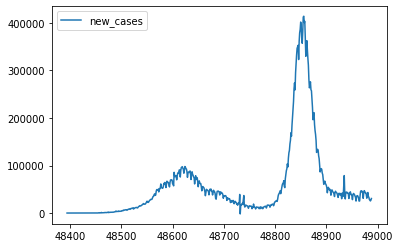

In [109]:
#plot data to view the trend
data_forecast.plot()
plt.show()

##change column to suit prophet

In [110]:
#change column to prophet format
data_forecast.columns=["ds","y"]
data_forecast["ds"]=to_datetime(data_forecast["ds"])
print(data_forecast.tail(5))


              ds        y
48984 2021-09-11  28591.0
48985 2021-09-12  27254.0
48986 2021-09-13  25404.0
48987 2021-09-14  27176.0
48988 2021-09-15  30570.0


## fit prophet model

In [111]:
#fit prophet model
model=Prophet()
model.fit(data_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## # create 30 dates to forecast starting from 16th Sep21 (India)

In [112]:
# create 30 dates to forecast starting from 16th Sep21

future=list()
for i in range(16,31):
  date='2021-09-%02d'%i
  future.append([date])

for i in range(1,16):
  date='2021-10-%02d'%i
  future.append([date])

future=pd.DataFrame(future)
future.columns=["ds"]
future["ds"]=to_datetime(future["ds"])

print(future)


           ds
0  2021-09-16
1  2021-09-17
2  2021-09-18
3  2021-09-19
4  2021-09-20
5  2021-09-21
6  2021-09-22
7  2021-09-23
8  2021-09-24
9  2021-09-25
10 2021-09-26
11 2021-09-27
12 2021-09-28
13 2021-09-29
14 2021-09-30
15 2021-10-01
16 2021-10-02
17 2021-10-03
18 2021-10-04
19 2021-10-05
20 2021-10-06
21 2021-10-07
22 2021-10-08
23 2021-10-09
24 2021-10-10
25 2021-10-11
26 2021-10-12
27 2021-10-13
28 2021-10-14
29 2021-10-15


##predict the cases

In [113]:
#predict the cases
forecast=model.predict(future)
print(forecast)

           ds         trend  ...  multiplicative_terms_upper          yhat
0  2021-09-16   8224.486015  ...                         0.0  10107.796045
1  2021-09-17   6983.691587  ...                         0.0  10133.938276
2  2021-09-18   5742.897158  ...                         0.0   7823.078706
3  2021-09-19   4502.102730  ...                         0.0   3346.411430
4  2021-09-20   3261.308301  ...                         0.0  -4279.198770
5  2021-09-21   2020.513873  ...                         0.0    760.959756
6  2021-09-22    779.719445  ...                         0.0   3621.733666
7  2021-09-23   -461.074984  ...                         0.0   1422.235046
8  2021-09-24  -1701.869412  ...                         0.0   1448.377277
9  2021-09-25  -2942.663840  ...                         0.0   -862.482293
10 2021-09-26  -4183.458269  ...                         0.0  -5339.149569
11 2021-09-27  -5424.252697  ...                         0.0 -12964.759769
12 2021-09-28  -6665.0471

## summarize the forecast

In [114]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2021-09-16  10107.796045 -58817.749554  81259.119334
1 2021-09-17  10133.938276 -61598.487912  85811.788916
2 2021-09-18   7823.078706 -72222.656607  82834.882999
3 2021-09-19   3346.411430 -71394.146956  80394.963156
4 2021-09-20  -4279.198770 -80010.348838  68109.914383


## plot forecast (for India)

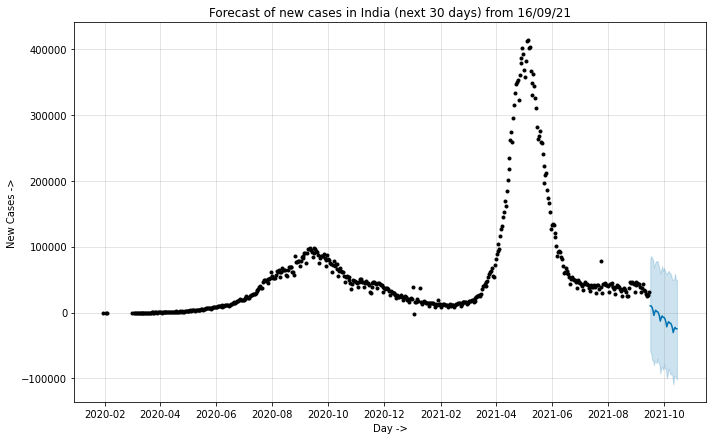

In [115]:
# plot forecast (for India)
model.plot(forecast)
plt.xlabel("Day ->")
plt.ylabel("New Cases ->")
plt.title("Forecast of new cases in India (next 30 days) from 16/09/21")
plt.show()

# Plot of the monthly trend of covid 19 cases starting from 1st Oct 2020

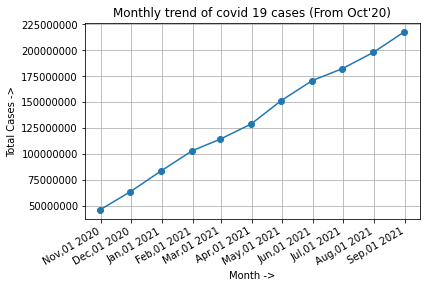

In [116]:
#convert to date
data_trend["date"]=to_datetime(data_trend["date"])

#plot
plt.plot_date(data_trend["date"],data_trend["total_cases"],marker="o",linestyle='solid')

#label
plt.xlabel("Month ->")
plt.ylabel("Total Cases ->")
plt.title("Monthly trend of covid 19 cases (From Oct'20)")

#format plot
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.ticklabel_format(style='plain',axis='y')
date_format=mpl_dates.DateFormatter('%b,%d %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()